# Author
This project was designed and coded by Divinity Gines

# Project Evolution
Originally started as a project to look at which colleges were producing the most Pro Volleyball Federation (PVF) players, but due to the Terms of Services of the PVF, scraping their data was not possible. That led to another idea of something that is currently relevant within the National Collegiate Athletic Association (NCAA), removing double contact penalties by the team's second touch [1]. This rule was changed in the NCAA due to the committee wanting a smoother and consistent game. But after reviewing the stats to see how many times a double contact interrupted a play, a double contact was marked as a BHE or ball handling error which constisted of: a double hit, a thrown ball, or a lifted ball [2]. So the data was not isolated to review double contact errors. This led to looking at the number of people in attendance at NCAA games and the locations of the PVF teams.


# Abstract
This project was created due to a love for the sport of volleyball. Especially with the start of the Pro Volleyball Federation in 2024, the first women's major league volleyball where they are offered a living wage in North America [3]. 

# Research Question
How significantly does the attendance at NCAA D1 Women's volleyball games influence the establishment of the Pro Volleyball Federation and the selection of its teams' locations?

# Background
With the Pro Volleyball Federation having its inaugural year this year, there is not much research done on the league. There have been other leagues that have started, but none as well advertised as the Pro Volleyball Federation. This could be due to the list of notable owners of the league's teams. The list includes NFL Quarterback Joe Burrow; American Singer-Songwriter Jason Derulo; CEO of DP Fox Sports Dan DeVos; CEO and Founder of Rally Sports Management Colleen Durham Craig; and three-time Olympic gold medalist in Beach Volleyball Kerri Walsh Jennings [4]. These people see potential in women's pro volleyball, but with this project we aim to see if this garnered interest in investing in the league is due to an increase attendance of people wanting to see these women play. More specifically if the teams were hosted in cities where their NCAA university team's attendance is higher. The Pro Volleyball Federation has teams in Duluth, Georgia; Columbus, Ohio; Grand Rapids, Michigan;  Omaha, Nebraska; Orlando, Florida; San Diego, California; and Henderson, Nevada [4].  

There are other leagues that have either been in the works or currently operating in the United States. Athletes Unlimited is a pro league situated as a fantasy draft where teams change weekly. Later this year another pro league, League One Volleyball (LOVB), announced that it will be starting.
With numerous pro leagues being established, the aim of this project is to identify any trends in college volleyball that contribute to the continuation of professional volleyball in the United States.

# Hypothesis
There is an increase in attendance to NCAA D1 Women's volleyball games, but only a significant increase can be observed in regions where the PVF has teams.

# Data
Because the data was not in a downloadable csv format, but in a table on the NCAA stats website. The data was scraped using selenium and chrome webdriver. Then the data was cleaned so that it can easily be looked at through pandas an numpy.

In [1]:
import csv
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# Attendance from 2020/21 is omitted due to outliers from the COVID 19 pandemic
# Women's volleyball is a Fall sport therefore it only occurs over the course of August-December
# Also these are all the available years with attendance data
urls = [
    {'url': "https://stats.ncaa.org/reports/attendance?id=10160", 'year': '2012'},
    {'url': "https://stats.ncaa.org/reports/attendance?id=10380", 'year': '2013'},
    {'url': "https://stats.ncaa.org/reports/attendance?id=12500", 'year': '2014'},
    {'url': "https://stats.ncaa.org/reports/attendance?id=13960", 'year': '2015'},
    {'url': "https://stats.ncaa.org/reports/attendance?id=15240", 'year': '2016'},
    {'url': "https://stats.ncaa.org/reports/attendance?id=16360", 'year': '2017'},
    {'url': "https://stats.ncaa.org/reports/attendance?id=17320", 'year': '2018'},
    {'url': "https://stats.ncaa.org/reports/attendance?id=18755", 'year': '2019'},
    {'url': "https://stats.ncaa.org/reports/attendance?id=20651", 'year': '2021'},
    {'url': "https://stats.ncaa.org/reports/attendance?id=21791", 'year': '2022'},
    {'url': "https://stats.ncaa.org/reports/attendance?id=22694", 'year': '2023'}
]

In [3]:
# Sets up the Chrome driver
driver = webdriver.Chrome()
all_data = []
count = 0

# Iterate through URLs
for entry in urls:
    count += 1
    driver.get(entry['url'])

    # Wait for the dynamic content to load
    time.sleep(5)

    # Find the table by its ID, found in function initDataTable var oTable = $('#stat_grid')
    table = driver.find_element(By.ID, 'stat_grid')

    # Find all the rows in the table body (excluding the header row)
    rows = table.find_elements(By.CSS_SELECTOR, 'tbody tr')

    # Extract data from each row
    for row in rows:
        # Get all cells from the row
        cells = row.find_elements(By.TAG_NAME, 'td')
        row_data = {
            'Year': entry['year'],
            'Rank': cells[0].text,
            'Institution': cells[1].text,
            'Conference': cells[2].text,
            'Accum Attendance': cells[3].text,
            'Avg Attendance': cells[4].text,
        }
        all_data.append(row_data)

# Close the driver
driver.quit()

In [4]:
csv_file = 'NCAAD1-WVB-Attendance.csv'

# Data to CSV
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=all_data[0].keys())
    
    # Write header
    writer.writeheader()
    
    # Write data rows
    for entry in all_data:
        writer.writerow(entry)

print(f"Data written to {csv_file} \n There are ",count," different seasons included in the csv")

Data written to NCAAD1-WVB-Attendance.csv 
 There are  11  different seasons included in the csv


In [5]:
#Clean Data
df = pd.read_csv("NCAAD1-WVB-Attendance.csv")
columns_with_commas = ['Accum Attendance', 'Avg Attendance']

#changes commas to nothing for int type
for column in columns_with_commas:
    df[column] = df[column].str.replace(',', '').astype(int)
#changed inf to 0   
df.replace([np.inf, -np.inf], 0, inplace=True)
    
df.to_csv('NCAAD1-WVB-Attendance.csv', index=False)

# Data Overview
Next we look at the accumulated data of the attendance from D1 Women's Volleyball games in the NCAA from 2012-2024, omitting the 2020/21 season due to COVID-19 shutting down most in person attendance. We built different csv files for different sorted data including the average attendance descending and the average attendance over 11 seasons, given they were D1 for all 11 of those seasons.

In [6]:
#Looking at the data scraped
df = pd.read_csv("NCAAD1-WVB-Attendance.csv")
first_10_rows = df.head(10)
print(first_10_rows)

   Year  Rank Institution Conference  Accum Attendance  Avg Attendance
0  2012     1      Hawaii   Big West            126827            6675
1  2012     2    Nebraska    Big Ten             77164            4287
2  2012     3    Penn St.    Big Ten             55783            3281
3  2012     4   Minnesota    Big Ten             53050            3316
4  2012     5       Texas     Big 12             52850            2643
5  2012     6  Louisville        AAC             51507            2341
6  2012     7      Purdue    Big Ten             48566            2857
7  2012     8     Florida        SEC             44418            2468
8  2012     9   Wisconsin    Big Ten             42278            3252
9  2012    10  Washington     Pac-12             41343            2432


In [7]:
#Grouping the data
df['Avg Attendance Over 11 Seasons*'] = df.groupby('Institution')['Avg Attendance'].transform('mean')
df['Avg Attendance Over 11 Seasons*'] = np.ceil(df['Avg Attendance Over 11 Seasons*']).astype(int)
df = df.sort_values(by=['Avg Attendance Over 11 Seasons*', 'Institution','Year'], ascending=[False, True, True])

# *Avg Attendance Over 11 Seasons depends on if the Institution was a D1 school for the entirety of  2012-2023, again omitting the 2020/21 season due to COVID-19

In [8]:
#moving the columns
cols = list(df.columns)
cols.remove('Avg Attendance Over 11 Seasons*')
cols.insert(6, 'Avg Attendance Over 11 Seasons*')
df = df[cols]

In [9]:
#cleaned data to csv
# df.to_csv('NCAAD1-WVB-AvgAttend11Seasons', index=False)
print(df.head(10))

      Year  Rank Institution Conference  Accum Attendance  Avg Attendance  \
1     2012     2    Nebraska    Big Ten             77164            4287   
329   2013     1    Nebraska    Big Ten            155324            8175   
662   2014     1    Nebraska    Big Ten            145493            8083   
996   2015     1    Nebraska    Big Ten            147714            8206   
1330  2016     1    Nebraska    Big Ten            155986            8210   
1664  2017     1    Nebraska    Big Ten            139432            8202   
1998  2018     1    Nebraska    Big Ten            172307            8205   
2334  2019     1    Nebraska    Big Ten            155531            8186   
2669  2021     1    Nebraska    Big Ten            147104            8172   
3009  2022     1    Nebraska    Big Ten            155618            8190   

      Avg Attendance Over 11 Seasons*  
1                                8229  
329                              8229  
662                             

In [10]:
avg11Season = df.groupby('Institution')['Avg Attendance Over 11 Seasons*'].mean().reset_index()

# Sort the grouped data in descending order of 'Avg Attendance Over 11 Seasons'
avg11Season = avg11Season.sort_values(by='Avg Attendance Over 11 Seasons*', ascending=False)

#print top 10 avg attendance over 11 seasons
print(avg11Season.head(10))

      Institution  Avg Attendance Over 11 Seasons*
181      Nebraska                           8229.0
105        Hawaii                           5987.0
342     Wisconsin                           5911.0
165     Minnesota                           4564.0
283         Texas                           3469.0
215      Penn St.                           3234.0
162  Michigan St.                           3015.0
115      Illinois                           2726.0
56   Colorado St.                           2673.0
331    Washington                           2621.0


In [11]:
top10Avg11SeasonInstitutions = ['Nebraska', 'Hawaii', 'Wisconsin', 'Minnesota', 'Texas', 'Penn St.', 'Michigan St.', 'Illinois', 'Colorado St.', 'Washington']

filtered_df = df[df['Institution'].isin(top10Avg11SeasonInstitutions)]
# filtered_df.to_csv('NCAAD1-WVB-Top10AvgAttend11Seasons', index=False)

In [12]:
top_avgAttendance = df.sort_values(by='Avg Attendance', ascending = False)
# top_avgAttendance.to_csv('NCAAD1-WVB-SortedAvgAttend', index=False)

# Exploratory Data Analysis
First, we will take a look at the list of the top 10 institutions with the highest average attendance over 11 seasons.

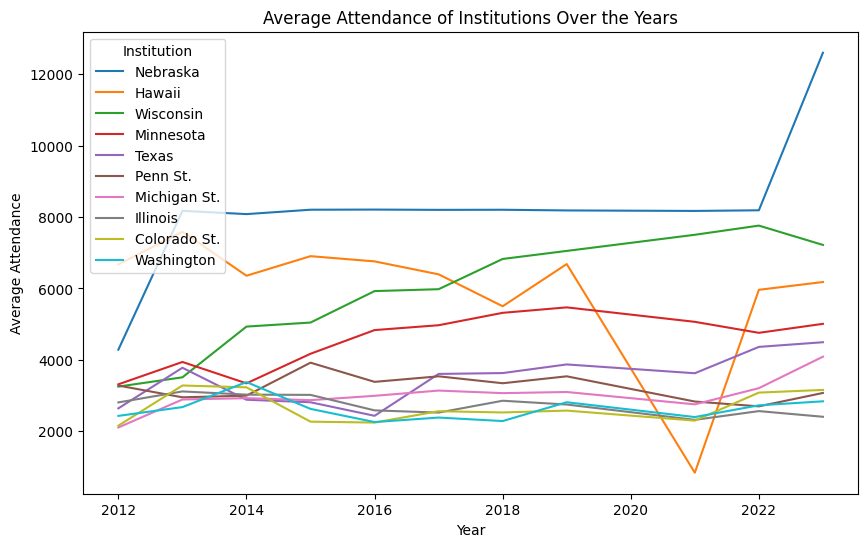

In [13]:
# For Average Attendance
# Get a list of unique institutions
institutions = filtered_df['Institution'].unique()

# Create a scatter plot for each institution
plt.figure(figsize=(10, 6))

for institution in institutions:
    # Filter the DataFrame for the current institution
    institution_df = filtered_df[filtered_df['Institution'] == institution]
    plt.plot(institution_df['Year'], institution_df['Avg Attendance'], label=institution)

# Adding titles and labels
plt.title('Average Attendance of Institutions Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.legend(title='Institution')

plt.show()


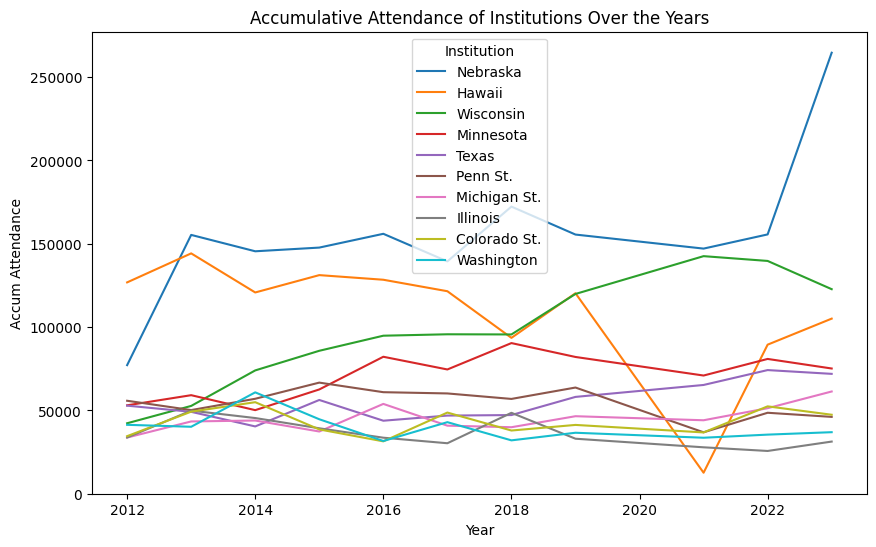

In [14]:
#For Accumulated Attendance
# Get a list of unique institutions
institutions = filtered_df['Institution'].unique()

# Create a scatter plot for each institution
plt.figure(figsize=(10, 6))

for institution in institutions:
    # Filter the DataFrame for the current institution
    institution_df = filtered_df[filtered_df['Institution'] == institution]
    plt.plot(institution_df['Year'], institution_df['Accum Attendance'], label=institution)

# Adding titles and labels
plt.title('Accumulative Attendance of Institutions Over the Years')
plt.xlabel('Year')
plt.ylabel('Accum Attendance')
plt.legend(title='Institution')

plt.show()

Although there are some clear upward trends with Wisconsin, the other top 10 average attendance institutions do not provide a clear model on whether there is an increase in attendance over the years. Because of this we will look at the linear regression over the average attendance and accumulative attendance by year for all institutions.

In [15]:
# Perform linear regression over all institutions
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Avg Attendance'])

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

Slope: 8.540521255809534
Intercept: -16585.83289155589
R-squared: 0.0011616815983513096
P-value: 0.038135305927668915
Standard error: 4.117619905068636


In [16]:
# Perform linear regression over all institutions
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Accum Attendance'])

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

Slope: 116.55594992301425
Intercept: -226337.67646902628
R-squared: 0.0007346460195984067
P-value: 0.0992168682235547
Standard error: 70.67952669820383


The data shows a statistically significant but slight upward trend in average attendance over the years as well as accumulative attendance. However, the extremely low $R^2$ value indicates that the year alone is a poor predictor of average attendance. The significance of the trend, as indicated by the p-value, suggests that there is some effect of time on attendance, but this effect is minimal and explains a very small proportion of the variability in attendance. The same can be said for accumulative attendance as the effect is even more miniscule.  

Surprisingly out of the seven cities that the PVF has teams in, only five out of the seven have D1 NCAA Women's Volleyball programs within 15 miles of the city. Those cities are:
* Columbus, Ohio: Ohio State
* Omaha, Nebraska: University of Nebraska-Omaha
* Orlando, Florida: University of Central Florida
* San Diego, California: University of California, San Diego; University of San Diego; and San Diego State University (where PVF's San Diego team will play)
* Henderson, Nevada: University of Nevada-Las Vegas

With that being said, we will now look at if the institutions near the PVF teams' cities have any correlation with the attendance.


In [17]:
PVF_Universities = ['Omaha', 'UCF','UC San Diego', 'San Diego', 'San Diego St.', 'UNLV']
PVF_df = df[df['Institution'].isin(PVF_Universities)]
PVF_df.to_csv('NCAAD1-WVB-PVFUniversities', index=False)

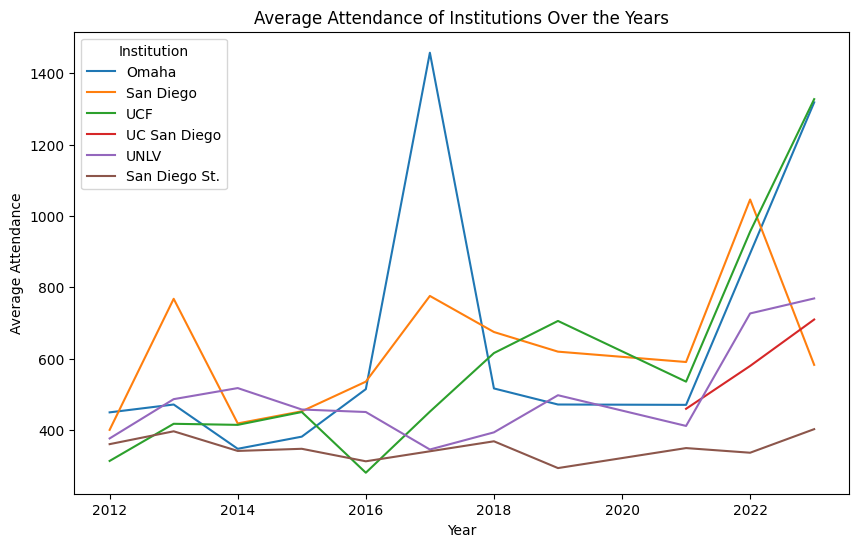

In [18]:
# Get a list of unique institutions
institutions = PVF_df['Institution'].unique()

# Create a scatter plot for each institution
plt.figure(figsize=(10, 6))

for institution in institutions:
    # Filter the DataFrame for the current institution
    PVF_institution_df = PVF_df[PVF_df['Institution'] == institution]
    plt.plot(PVF_institution_df['Year'], PVF_institution_df['Avg Attendance'], label=institution)

# Adding titles and labels
plt.title('Average Attendance of Institutions Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.legend(title='Institution')

plt.show()

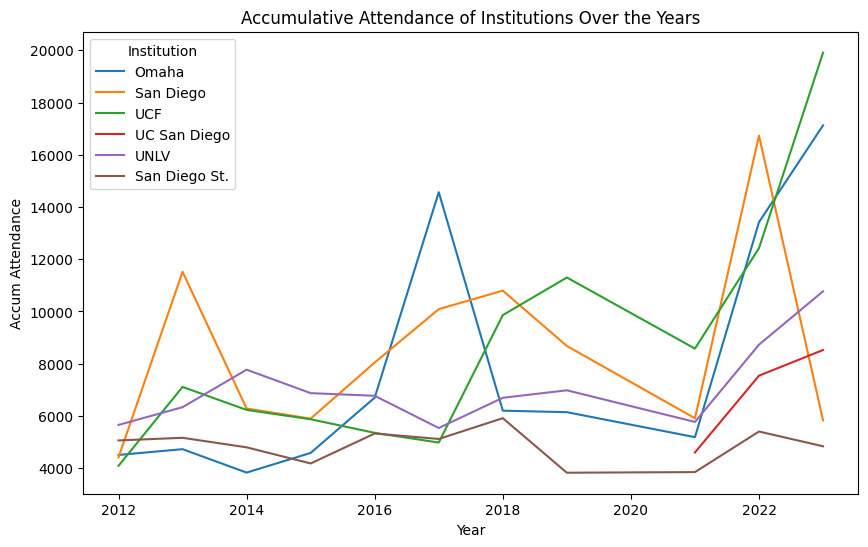

In [19]:
# Get a list of unique institutions
institutions = PVF_df['Institution'].unique()

# Create a scatter plot for each institution
plt.figure(figsize=(10, 6))

for institution in institutions:
    # Filter the DataFrame for the current institution
    PVF_institution_df = PVF_df[PVF_df['Institution'] == institution]
    plt.plot(PVF_institution_df['Year'], PVF_institution_df['Accum Attendance'], label=institution)

# Adding titles and labels
plt.title('Accumulative Attendance of Institutions Over the Years')
plt.xlabel('Year')
plt.ylabel('Accum Attendance')
plt.legend(title='Institution')

plt.show()

There is no substantial increase in attendance except from 2021 to 2024 where all institutions, with the exception of San Diego State and San Diego, have seen an increase in average and accumulative attendance. This is the post-COVID era and it can be observed that institutions such as UCF, Omaha, UNLV, and UC San Diego have seen a substantial increase in attendance. Now we will look at the linear regression.

In [20]:
# Perform linear regression over all institutions
slope, intercept, r_value, p_value, std_err = linregress(PVF_df['Year'], PVF_df['Avg Attendance'])

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

Slope: 32.04536215816706
Intercept: -64105.88100517373
R-squared: 0.20546168575612325
P-value: 0.000352714445914133
Standard error: 8.420990343941948


In [21]:
# Perform linear regression over all institutions
slope, intercept, r_value, p_value, std_err = linregress(PVF_df['Year'], PVF_df['Accum Attendance'])

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

Slope: 426.880497043607
Intercept: -853846.1938285297
R-squared: 0.1921759346946233
P-value: 0.0005776403671145685
Standard error: 116.95564609442519


With average attendance we see a significant positive linear relationship between the year and both accumulative and average attendance respectively. Both also had low p-values reinforcing that there is a significant relationship between these variables.

# Limitations and Future Work
While there was an increase overall in the NCAA D1 attendance, that does not include those who watch from home nor are the numbers significant enough to come to a conclusion as to D1 Women's volleyball as a whole has influenced the start of the PVF. This also does not fully cover the extent of interest that people have in pro volleyball, as those who follow pro basketball or football may not always watch their corresponding college teams. With that being said, future work that can be done includes looking at the amount of people who watch from home in addition to those who attend in person.

# Conclusion
This project's investigation into attendance trends at NCAA D1 Women's volleyball games shows a complex picture of how fans are engaging with the sport across the United States. Although the overall growth in attendance is small and not directly linked to the start of the Pro Volleyball Federation, looking closely at specific areas reveals a significant rise in both average and total attendance numbers. Notably, this increase is most significant in areas proximal to where the PVF has elected to introduce teams, with a marked spike observed from 2021 to 2024. This correlation suggests that the PVF's strategic decision-making was informed by a recognition of growing volleyball fandom in these areas.  

The timing of the PVF's announcement at the end of 2022, set against the rising attendance trend from the previous years, further supports the inference that these regions were better for the introduction of professional teams. This alignment between fan interest and PVF's operational strategy underscores the Federation's effective identification of prospering markets for competitive volleyball in the US. It reflects a promising foundation for the PVF's objectives to foster and capitalize on the sport's growing popularity.  

Ultimately, this analysis affirms that the PVF's selections for team locations were not arbitrary but were instead a calculated move towards regions displaying a tangible increase in volleyball engagement. This conclusion is inline with the hypothesis that the PVF's teams locations were selected where there was a significant increase in attendance over the years. As the Federation looks to solidify its presence and expand its influence within the American sports landscape, these findings offer a compelling narrative of a thoughtful and data-informed approach to league expansion. The increasing attendance figures in the years leading up to and following the PVF's establishment provide a positive indicator of the sport's potential for sustained growth and popularity. As volleyball continues to carve out its niche in the competitive sports arena, the PVF's strategic foresight in choosing its initial team locations appears to be a promising step towards achieving its vision for the sport's future in the United States.

# Citations
[1]: https://www.ncaa.org/news/2024/2/20/media-center-double-contacts-approved-in-womens-volleyball - "Double contacts approved in women’s volleyball"  
[2]: http://fs.ncaa.org/Docs/stats/Stats_Manuals/VB/2010reg.pdf - "2010 Volleyball Statisticians’ Manual"  
[3]: https://provolleyball.com/our-time-is-now - "Pro Volleyball Federation"  
[4]: https://www.sportsbusinessjournal.com/Articles/2024/01/22/leagues-and-governing-bodies - "Pro Volleyball Federation set for debut"